In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

In [2]:
train_df = pd.read_csv("C:/Users/Dell/Downloads/Train _hack.csv")
test_df = pd.read_csv("C:/Users/Dell/Downloads/Test _hack.csv")

In [3]:
train_df['source']='train'
test_df['source']='test'
df = pd.concat([train_df, test_df],ignore_index=True)
print(train_df.shape, test_df.shape, df.shape)

(14576, 16) (2143, 15) (16719, 16)


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales,source
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53,train
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24,train
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52,train
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77,train
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37,train


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00
Global_Sales,14576.0,0.598972,1.647699,0.01,0.05,0.22,0.55,82.53


In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Global_Sales       2143
source                0
dtype: int64

In [7]:
df.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
Global_Sales       0.128178
source             0.000000
dtype: float64

In [8]:
for j in df[df['Year_of_Release'].isnull()].index.tolist():
    df.Year_of_Release.iloc[j] =  df.Year_of_Release[df['Platform']==df['Platform'].iloc[j]].mode().max()
df['Year_of_Release'] = df['Year_of_Release'].astype(str)    

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
df.drop(df[df['Genre'].isnull()].index.tolist(), axis=0, inplace=True) 

In [10]:
df.Publisher.fillna("Others",inplace=True)

In [11]:
df.Critic_Score.fillna(df.Critic_Score.mean(),inplace=True)

In [12]:
df.Critic_Count.fillna(df.Critic_Count.mean(),inplace=True)

In [13]:
df.User_Score = df.User_Score.replace('tbd',None)
df.User_Score.fillna('0',inplace=True)
df.User_Score = df.User_Score.astype(float)
df.User_Score = df.User_Score.replace(0,df.User_Score.mean())

In [14]:
df.User_Count.fillna(df.User_Count.mean(),inplace=True)

In [15]:
df.Rating.fillna("Others",inplace=True)    

In [16]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
Global_Sales       2143
source                0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Critic_Score     16717 non-null  float64
 9   Critic_Count     16717 non-null  float64
 10  User_Score       16717 non-null  float64
 11  User_Count       16717 non-null  float64
 12  Developer        10096 non-null  object 
 13  Rating           16717 non-null  object 
 14  Global_Sales     14574 non-null  float64
 15  source           16717 non-null  object 
dtypes: float64(8), object(8)
memory usage: 2.2+ MB


In [18]:
dfd = pd.get_dummies(df.drop(['Name','source'],axis=1))
dfd['source'] = df.source 

In [19]:
dfd.head()

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_Others,Rating_RP,Rating_T,source
0,41.36,28.96,3.77,76.000000,51.000000,8.000000,322.000000,82.53,0,0,...,0,1,0,0,0,0,0,0,0,train
1,29.08,3.58,6.81,68.967679,26.360821,3.720386,162.229908,40.24,0,0,...,0,0,0,0,0,0,1,0,0,train
2,15.68,12.76,3.79,82.000000,73.000000,8.300000,709.000000,35.52,0,0,...,0,1,0,0,0,0,0,0,0,train
3,15.61,10.93,3.28,80.000000,73.000000,8.000000,192.000000,32.77,0,0,...,0,1,0,0,0,0,0,0,0,train
4,11.27,8.89,10.22,68.967679,26.360821,3.720386,162.229908,31.37,0,0,...,0,0,0,0,0,0,1,0,0,train


In [20]:
train = dfd.loc[dfd['source']=="train"]
test = dfd.loc[dfd['source']=="test"]

In [21]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Global_Sales','source'],axis=1,inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
x = train.drop(['Global_Sales'],axis=1)
y = train['Global_Sales']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
pca = PCA(n_components=500)

In [24]:
pca.fit(train_x)

PCA(n_components=500)

In [25]:
components=pca.transform(train_x)

In [26]:
pcs_analysis=pca.explained_variance_ratio_

In [27]:
components=pd.DataFrame(components)

<AxesSubplot:>

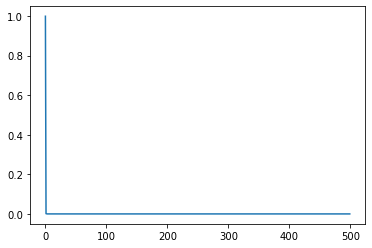

In [28]:
sns.lineplot(data=pcs_analysis)

In [29]:
cummi=np.cumsum(pcs_analysis)

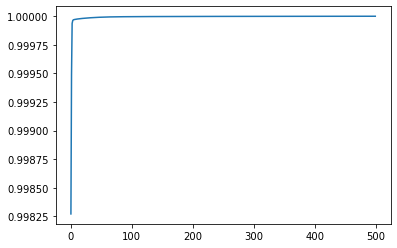

In [30]:
plt.plot(cummi)

In [31]:
pca = PCA(n_components=500)

In [32]:
pca.fit(test_x)

PCA(n_components=500)

In [61]:
pca.fit(x)

PCA(n_components=500)

In [54]:
pca.fit(test)

PCA(n_components=500)

In [33]:
components1=pca.transform(test_x)

In [62]:
res=pca.transform(x)

In [55]:
compo=pca.transform(test)

In [34]:
pcs_analysis=pca.explained_variance_ratio_

<AxesSubplot:>

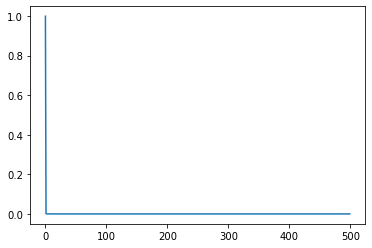

In [35]:
sns.lineplot(data=pcs_analysis)

In [36]:
components1=pd.DataFrame(components1)

In [56]:
compo = pd.DataFrame(compo)

In [63]:
res=pd.DataFrame(res)

In [37]:
cummi=np.cumsum(pcs_analysis)

In [38]:
scaler=MinMaxScaler()
train_x=scaler.fit_transform(components)
test_x=scaler.transform(components1)

In [39]:
components1.shape

(2915, 500)

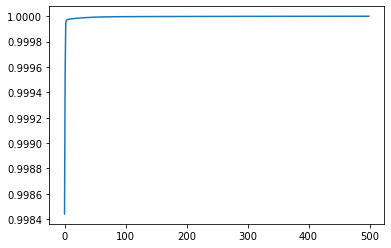

In [40]:
plt.plot(cummi)

In [41]:
modelLinear = LinearRegression()
modelLinear.fit(components,train_y)

LinearRegression()

In [42]:
lineartrain = r2_score(train_y,modelLinear.predict(components))
lineartest = r2_score(test_y,modelLinear.predict(components1))
rmslineartrain = mean_squared_error(train_y, modelLinear.predict(components), squared=False)
rmslineartest = mean_squared_error(test_y, modelLinear.predict(components1), squared=False)

In [43]:
modeldtr = DecisionTreeRegressor(random_state=42)
modeldtr.fit(components,train_y)

DecisionTreeRegressor(random_state=42)

In [44]:
dtrtrain = r2_score(train_y,modeldtr.predict(components))
dtrtest = r2_score(test_y,modeldtr.predict(components1))
rmsdtrtrain = mean_squared_error(train_y, modeldtr.predict(components), squared=False)
rmsdtrtest = mean_squared_error(test_y, modeldtr.predict(components1), squared=False)

In [ ]:
modelrfr = RandomForestRegressor(random_state=42)
modelrfr.fit(components,train_y)

In [ ]:
rfrtrain = r2_score(train_y,modelrfr.predict(components))
rfrtest = r2_score(test_y,modelrfr.predict(components1))
rmsrfrtrain = mean_squared_error(train_y, modelrfr.predict(components), squared=False)
rmsrfrtest = mean_squared_error(test_y, modelrfr.predict(components1), squared=False)

In [45]:
modelgbr = GradientBoostingRegressor(random_state=101)
modelgbr.fit(components,train_y)

GradientBoostingRegressor(random_state=101)

In [47]:
gbrtrain = r2_score(train_y,modelgbr.predict(components))
gbrtest = r2_score(test_y,modelgbr.predict(components1))
rmsgbrtrain = mean_squared_error(train_y, modelgbr.predict(components), squared=False)
rmsgbrtest = mean_squared_error(test_y, modelgbr.predict(components1), squared=False)

In [ ]:
modelabr = AdaBoostRegressor(random_state=42)
modelabr.fit(components,train_y)

In [ ]:
abrtrain = r2_score(train_y,modelabr.predict(components))
abrtest = r2_score(test_y,modelgbr.predict(components1))
rmsabrtrain = mean_squared_error(train_y, modelabr.predict(components), squared=False)
rmsabrtest = mean_squared_error(test_y, modelabr.predict(components1), squared=False)

In [64]:
modelrdg = Ridge(random_state=108)
modelrdg.fit(res,y)

Ridge(random_state=108)

In [65]:
res.shape

(14574, 500)

In [57]:
scaler=MinMaxScaler()
compo=scaler.fit_transform(compo)

In [59]:
compo.shape

(2143, 500)

In [66]:
submission = pd.DataFrame({'Name':test_df['Name'],'Global sales': modelrdg.predict(compo)},columns=['Name','Global sales'])

In [67]:
submission.to_csv('C:/Users/Dell/OneDrive/Desktop/uni/New folder2.csv',index=False)